In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('new_cook_corr.csv')

In [3]:
X = data.iloc[:,2:7].values
y = data.iloc[:,7].values

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.1,random_state=1)

In [5]:
X_train.shape,X_test.shape

((59, 5), (7, 5))

In [6]:
from sklearn.svm import SVR
params = {'epsilon': np.arange(0.1,10,0.1), 'kernel':['poly','rbf'], 'gamma':['scale','auto'],'tol':[0.0001,0.001,0.01,0.1],'C':np.arange(0.1,10,0.1)}
search = GridSearchCV(SVR(), param_grid = params, cv = 5,scoring='neg_mean_absolute_error',verbose=1,return_train_score=True )
#search.fit(scaler.transform(X_train),y_train)

In [7]:
scaler = StandardScaler()

In [8]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
cv = KFold(n_splits=5, shuffle=True, random_state=1)
for train, test in cv.split(X_train, y_train):
    scaler.fit(X_train[train])
    search.fit(scaler.transform(X_train[train]),y_train[train])
search.best_params_

Fitting 5 folds for each of 156816 candidates, totalling 784080 fits
Fitting 5 folds for each of 156816 candidates, totalling 784080 fits
Fitting 5 folds for each of 156816 candidates, totalling 784080 fits
Fitting 5 folds for each of 156816 candidates, totalling 784080 fits
Fitting 5 folds for each of 156816 candidates, totalling 784080 fits


{'C': 0.1,
 'epsilon': 0.30000000000000004,
 'gamma': 'scale',
 'kernel': 'poly',
 'tol': 0.1}

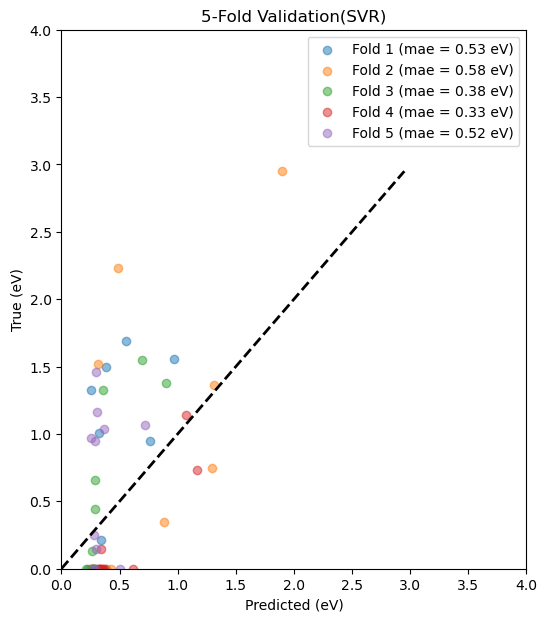

In [9]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
model =  SVR(kernel = 'poly', epsilon=0.3, C=0.1, gamma='scale', tol=0.1)
scores = []
scaler = StandardScaler()
cv = KFold(n_splits=5, shuffle=True, random_state=1)
fig = plt.figure(figsize=(6,7))
i = 1
for train, test in cv.split(X_train, y_train):
    scaler.fit(X_train[train])
    model.fit(scaler.transform(X_train[train]),
                 y_train[train])
    prediction = abs(model.predict(scaler.transform(X_train[test])))
    true = y_train[test]
    score = mean_absolute_error(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=1, alpha=0.5, 
                label='Fold %d (mae = %0.2f eV)' % (i,score))
    i = i+1
plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted (eV)')
plt.ylabel('True (eV)')
plt.title('5-Fold Validation(SVR)')
plt.xlim([0, 4])
plt.ylim([0, 4])
plt.legend()
plt.savefig('newSVR_5foldVal.png')
plt.show()


In [10]:
from sklearn.svm import SVR
params = {'epsilon': np.arange(0.1,10,0.1), 'kernel':['poly','rbf'], 'gamma':['scale','auto'],'tol':[0.0001,0.001,0.01,0.1],'C':np.arange(0.1,10,0.1)}
search = GridSearchCV(SVR(), param_grid = params, cv = 5,scoring='neg_mean_absolute_error',verbose=1,return_train_score=True )
search.fit(scaler.transform(X_train),y_train)

Fitting 5 folds for each of 156816 candidates, totalling 784080 fits


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5,...
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
                         'gamma': ['scale', 'auto'], 'kernel': ['poly', 'rbf'],
                         'tol': [0.0001, 0.001, 0.01, 0.1]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [11]:
search.best_params_

{'C': 0.2, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'poly', 'tol': 0.1}

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
reg = SVR(kernel = 'poly', epsilon=0.1, C=0.2, gamma='auto', tol=0.1)
reg.fit(scaler.transform(X_train),y_train)
y_pred = abs(reg.predict(scaler.transform(X_test)))
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [13]:
mse, mae, rmse

(0.24057704571280222, 0.36718265302861697, 0.4904865397875891)